In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
from ctadiv import *

## Select the CTA location and time of observation

In [3]:
time='2020-06-20T00:00'
div=0.0022
name='altair'

In [4]:
cta = CTA_Info('north',time)
cta.altaz

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-06-20T00:00:00.000


<AltAz Frame (obstime=2020-06-20T00:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)>

In [5]:
from astropy.coordinates import SkyCoord, EarthLocation, AltAz, ICRS

## Set source location

In [6]:
from astropy.coordinates import get_icrs_coordinates
star = get_icrs_coordinates(name)
star

<SkyCoord (ICRS): (ra, dec) in deg
    (297.6958273, 8.8683212)>

In [7]:
print ("source:", cta.source)
cta.set_source_loc(ra=star.ra, dec=star.dec)
print ("source:", cta.source)
if cta.source.alt<=24*u.deg:
    print('\n\tWARNING: you source is not visible')

source: None
source: <SkyCoord (AltAz: obstime=2020-06-20T00:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (104.4932242, 41.56280907)>


## Get locations (sun, moon, source)

## Plot the naviation plot (Sun, Moon, and a source)

<IPython.core.display.Javascript object>


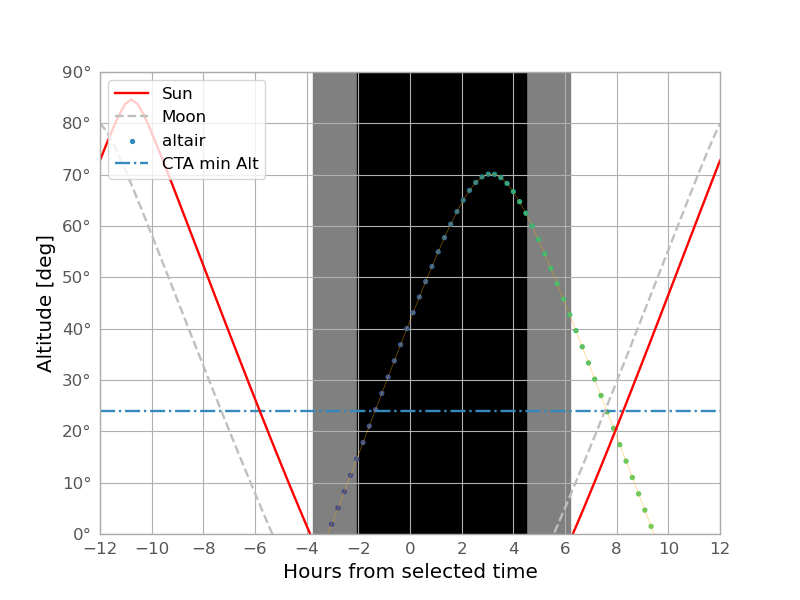

In [8]:
cta.navigation_plot(label = name)
plt.savefig(f'navigation_{name}_{time}.png')
#plt.show()

## Load array and pointing to a source

In [9]:
array =  LoadConfig("./config/layout-3AL4M15-5.txt", frame=cta, pointing2src=True)

#array.set_pointing_coord(star.ra, star.dec)
array.table.units='deg'
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-70.04,-7.23,54.0,104.493,41.563,48.437,28.000,2.150,14.536,-0.187,-0.724,0.663,34.63
2,-34.37,110.98,43.0,104.493,41.563,48.437,28.000,2.150,14.536,-0.187,-0.724,0.663,94.18
3,76.18,95.34,39.7,104.493,41.563,48.437,28.000,2.150,14.536,-0.187,-0.724,0.663,166.98
4,31.81,-19.7,43.0,104.493,41.563,48.437,28.000,2.150,14.536,-0.187,-0.724,0.663,117.20
5,-210.65,50.51,61.3,104.493,41.563,48.437,16.000,3.850,46.707,-0.187,-0.724,0.663,137.60
6,-179.06,223.02,42.1,104.493,41.563,48.437,16.000,3.850,46.707,-0.187,-0.724,0.663,222.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14,-196.4,-290.24,88.1,104.493,41.563,48.437,16.000,3.850,46.707,-0.187,-0.724,0.663,341.27


## Activate the divergent pointing mode

In [10]:
array.divergent_pointing(div) #0.01453   0.0043

In [11]:
array.hFoV(m_cut=3)

<Quantity 53.52859582 deg2>

<IPython.core.display.Javascript object>


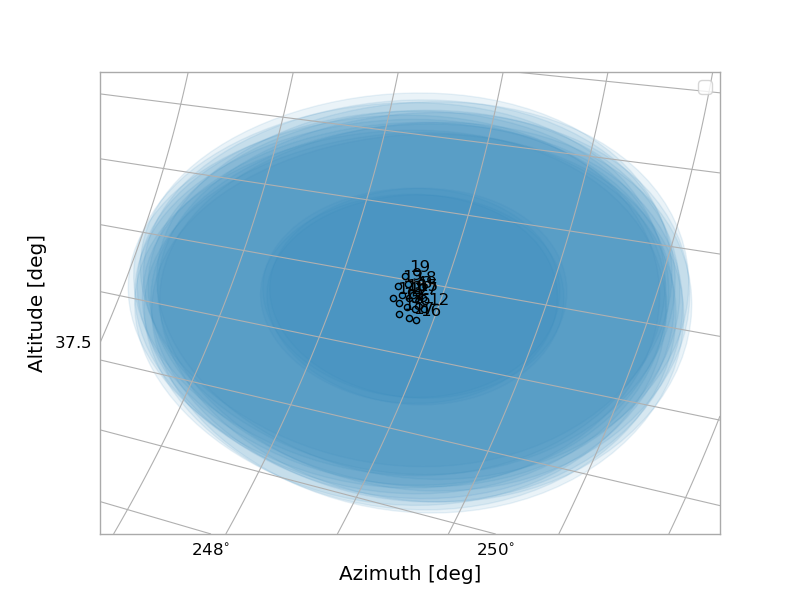

No handles with labels found to put in legend.


In [12]:
array.skymap_polar()

<IPython.core.display.Javascript object>


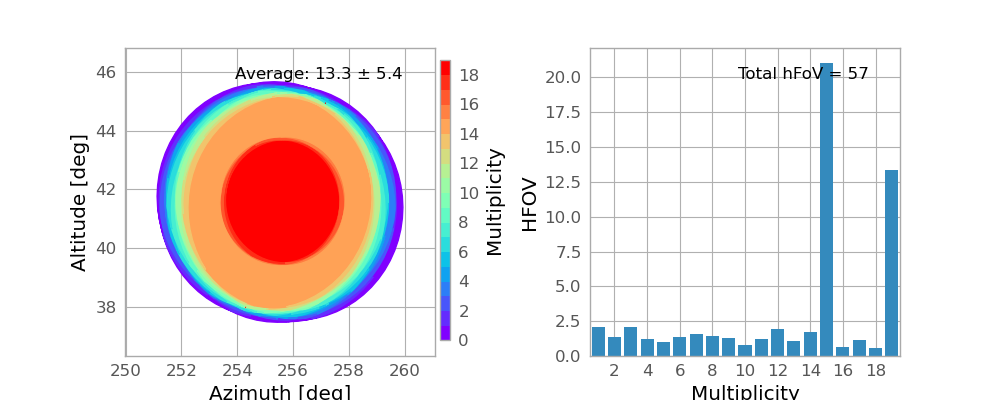

In [13]:
array.multiplicity_plot()

In [14]:
initial_pointing_dir=array.get_pointing_coord(icrs=True)

In [15]:
array.get_pointing_coord(icrs=False)

<SkyCoord (AltAz: obstime=2020-06-20T00:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    [(255.53023929, 41.54127312), (255.53868801, 41.63417368),
     (255.72618164, 41.64136294), (255.7015374 , 41.54194792),
     (255.27664833, 41.565239  ), (255.25414893, 41.69373844),
     (255.58490973, 41.73649274), (255.87678008, 41.66923237),
     (255.89954576, 41.46473055), (255.57998725, 41.42900843),
     (255.34363418, 41.4368815 ), (255.32089324, 41.81597454),
     (255.80291674, 41.33614678), (255.44410298, 41.31930973),
     (255.62413694, 41.58502978), (254.9808701 , 41.76185887),
     (255.00384211, 41.64439179), (255.04571463, 41.49194154),
     (256.08389867, 41.38591616)]>

In [16]:
star.transform_to(cta.altaz)

<SkyCoord (AltAz: obstime=2020-06-20T00:00:00.000, location=(5327285.09211954, -1718777.11250295, 3051786.7327476) m, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (104.4932242, 41.56280907)>

## Shifting the observation time and check how it change

In [17]:
array.update_frame(time = time, verbose=True)
array.update_frame(delta_t = 10*u.min, verbose=True)

Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-06-20T00:00:00.000
Observer         :  CTA North
Location         :  Roque de los Muchachos , (5327.28509212, -1718.7771125, 3051.78673275) km
Observation time :  2020-06-20T00:10:00.000


In [18]:
array.hFoV(m_cut=3)

<Quantity 53.81856533 deg2>

In [19]:
final_pointing_dir=array.get_pointing_coord(icrs=True)
final_pointing_dir

<SkyCoord (ICRS): (ra, dec) in deg
    [(208.34999674, 9.02231257), (208.43339073, 9.07463325),
     (208.36888815, 9.19928909), (208.28614392, 9.13337266),
     (208.46860198, 8.87078393), (208.59711604, 8.92142349),
     (208.51186471, 9.15599533), (208.33918174, 9.31057247),
     (208.13963325, 9.22280393), (208.22746098, 8.99782893),
     (208.32363824, 8.84896218), (208.68596378, 9.02621995),
     (208.05478644, 9.09556336), (208.17556004, 8.85441859),
     (208.35568971, 9.10502853), (208.76780578, 8.78043862),
     (208.64558979, 8.73539892), (208.48745485, 8.68470651),
     (207.99546445, 9.30300312)]>

In [20]:
array.pointing

{'az': <Quantity 106.23544398 deg>,
 'alt': <Quantity 43.68186041 deg>,
 'ra': <Quantity 297.6958273 deg>,
 'dec': <Quantity 8.8683212 deg>}

<IPython.core.display.Javascript object>


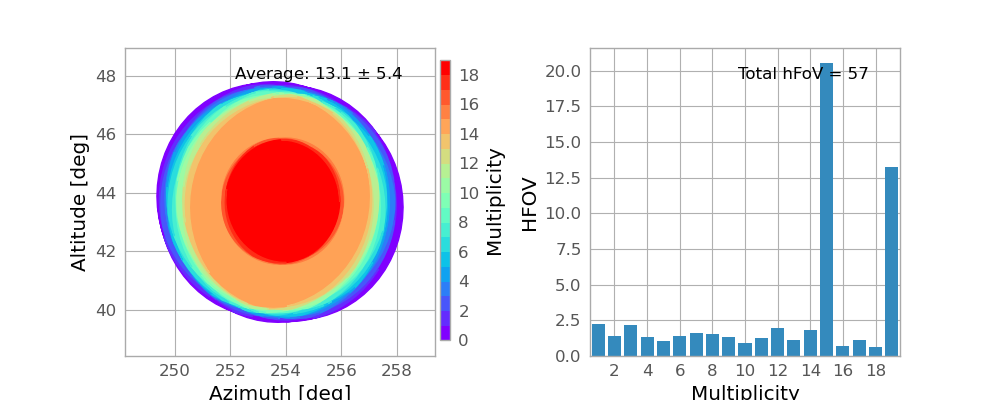

In [21]:
array.multiplicity_plot()

## Get parameters (hFoV, alt, and m) as a function of time

In [22]:
array.update_frame(time = time)

fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
hFoV = [fov.value]
mAve = [m_ave]
t = [0]
alt = [array.pointing["alt"].value]
for i in range(24):
    t.append((i+1)*5)
    array.update_frame(delta_t = 5*u.min)
    fov, m_ave, m_var = array.hFoV(m_cut=3, return_multiplicity=True)
    hFoV.append(fov.value)
    mAve.append(m_ave)
    alt.append(array.pointing["alt"].value)

<IPython.core.display.Javascript object>


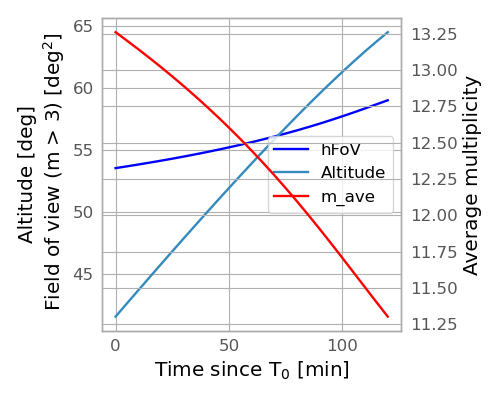

In [23]:
f, ax = plt.subplots(1, 1, figsize=(5,4))
p1 = ax.plot(t, hFoV, color="b", label="hFoV")
p2 = ax.plot(t, alt, label="Altitude")
ax.set_xlabel("Time since T$_{0}$ [min]")
ax.set_ylabel("Altitude [deg]\n Field of view (m > 3) [deg$^2$]", multialignment='center')

ax2 = ax.twinx()
p3 = ax2.plot(t, mAve, color="r", label="m_ave")
ax2.set_ylabel("Average multiplicity")
plt.tight_layout()
ps = p1+p2+p3
ax.legend(ps, [p.get_label() for p in ps], loc=5)
plt.show(block=False)
plt.savefig(f'evolution_{name}_{time}_{div}.png')

In [24]:
star

<SkyCoord (ICRS): (ra, dec) in deg
    (297.6958273, 8.8683212)>

In [25]:
diff=[]
for i in range(len(initial_pointing_dir)):
    diff.append([initial_pointing_dir[i].ra-final_pointing_dir[i].ra,initial_pointing_dir[i].dec-final_pointing_dir[i].dec])

In [26]:
diff

[[<Angle -5.01321564 deg>, <Angle 0.0040784 deg>],
 [<Angle -5.01900976 deg>, <Angle 0.00463729 deg>],
 [<Angle -5.02059003 deg>, <Angle 0.00418514 deg>],
 [<Angle -5.01500539 deg>, <Angle 0.00362714 deg>],
 [<Angle -5.01262412 deg>, <Angle 0.00488417 deg>],
 [<Angle -5.02077707 deg>, <Angle 0.00574223 deg>],
 [<Angle -5.02621268 deg>, <Angle 0.00516979 deg>],
 [<Angle -5.02450212 deg>, <Angle 0.00396152 deg>],
 [<Angle -5.01222377 deg>, <Angle 0.00260343 deg>],
 [<Angle -5.00766438 deg>, <Angle 0.00325808 deg>],
 [<Angle -5.00520874 deg>, <Angle 0.00392755 deg>],
 [<Angle -5.02922323 deg>, <Angle 0.00635369 deg>],
 [<Angle -5.0022154 deg>, <Angle 0.00207572 deg>],
 [<Angle -4.99839555 deg>, <Angle 0.00295436 deg>],
 [<Angle -5.01712153 deg>, <Angle 0.00410479 deg>],
 [<Angle -5.02620191 deg>, <Angle 0.0068569 deg>],
 [<Angle -5.01476988 deg>, <Angle 0.00604869 deg>],
 [<Angle -5.00512338 deg>, <Angle 0.00501443 deg>],
 [<Angle -5.00788259 deg>, <Angle 0.00158825 deg>]]